In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [99]:
df = pd.read_csv(r'data\sales.csv')

In [100]:
df

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [102]:
df.describe(include = 'object')

,Brands,Models,Colors,Memory,Storage,Camera,Mobile
count,3114,3114,3114,3071,3075,3114,3114
unique,17,914,639,26,26,1,928
top,SAMSUNG,iPhone 11,Black,4 GB,64 GB,Yes,Apple iPhone 11
freq,719,36,489,750,774,3114,36


In [103]:
df.duplicated().sum()

108

In [104]:
df.drop_duplicates(keep='first', inplace=True)

In [105]:
df1 = df['Brands'].value_counts()
df1

Brands
SAMSUNG         704
Apple           324
realme          322
OPPO            257
Nokia           199
Xiaomi          198
Infinix         150
GIONEE          128
vivo            124
Lenovo          117
ASUS            117
Motorola        104
LG               99
POCO             74
HTC              55
Google Pixel     29
IQOO              5
Name: count, dtype: int64

In [106]:
len(df1)

17

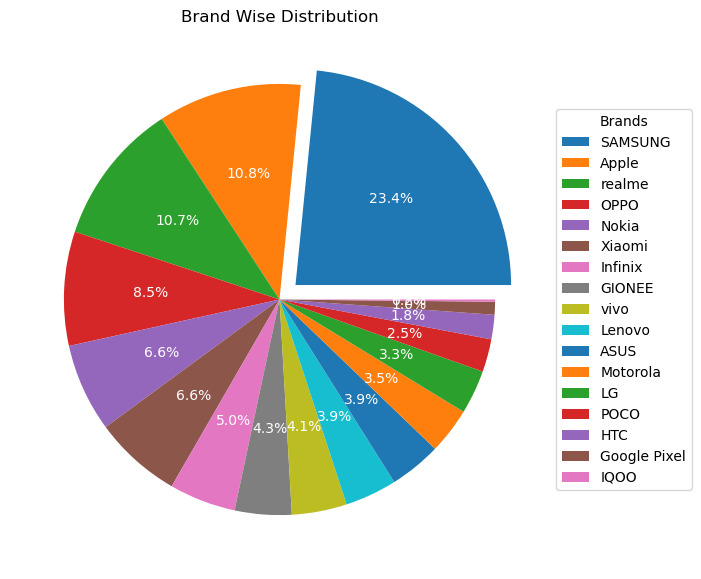

In [107]:
plt.figure(figsize=(10, 7))
plt.title('Brand Wise Distribution')
explode = [0.1 if i == max(df1) else 0 for i in df1]
wedges, texts, autotexts = plt.pie(df1, labels=None, autopct='%1.1f%%', explode=explode)
# Add legend outside the pie char
plt.legend(wedges, df1.index, title="Brands", loc="center left", bbox_to_anchor=(1, 0.5))
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.show()


In [108]:
df.isnull().sum()

Brands                   0
Models                   0
Colors                   0
Memory                  40
Storage                 39
Camera                   0
Rating                 130
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

In [109]:
brand_model_counts = df.groupby('Brands')['Models'].nunique()

In [110]:
brand_model_counts

Brands
ASUS             33
Apple            28
GIONEE           61
Google Pixel     11
HTC              29
IQOO              1
Infinix          41
LG               64
Lenovo           55
Motorola         50
Nokia            83
OPPO             77
POCO             14
SAMSUNG         211
Xiaomi           49
realme           62
vivo             59
Name: Models, dtype: int64

In [111]:
# Top Selling Models
top_selling_models = df['Models'].value_counts()
top_selling_models

Models
3                    26
iPhone 11            19
iPhone 13 Pro Max    19
iPhone XR            18
iPhone 12            18
                     ..
Edge+                 1
V40 ThinQ             1
Nexus4 E960           1
150                   1
ROG Phone 5 Pro       1
Name: count, Length: 914, dtype: int64

In [112]:
dff = df[df['Models'] == 'iPhone 11 '].Brands.iloc[0]
dff

'Apple'

In [113]:
total_revenue_iphone11 = df[df['Models'] == 'iPhone 11 '][['Selling Price']].sum()
total_revenue_iphone11

Selling Price    1073100
dtype: int64

In [114]:
df['Memory'].value_counts()

Memory
4 GB      736
6 GB      492
3 GB      477
2 GB      365
8 GB      340
1 GB      191
4GB       113
12 GB      60
512 MB     46
4 MB       39
1.5 GB     29
16 MB      15
64 MB      14
32 MB      14
8 MB       10
768 MB      6
128 MB      4
10 MB       3
2 MB        2
46 MB       2
18 GB       2
16 GB       2
153 MB      1
30 MB       1
32 GB       1
100 MB      1
Name: count, dtype: int64

In [115]:
df['Memory'] = df['Memory'].replace('4GB', '4 GB')

In [116]:
df['Memory'].value_counts()

Memory
4 GB      849
6 GB      492
3 GB      477
2 GB      365
8 GB      340
1 GB      191
12 GB      60
512 MB     46
4 MB       39
1.5 GB     29
16 MB      15
64 MB      14
32 MB      14
8 MB       10
768 MB      6
128 MB      4
10 MB       3
2 MB        2
46 MB       2
18 GB       2
16 GB       2
153 MB      1
30 MB       1
32 GB       1
100 MB      1
Name: count, dtype: int64

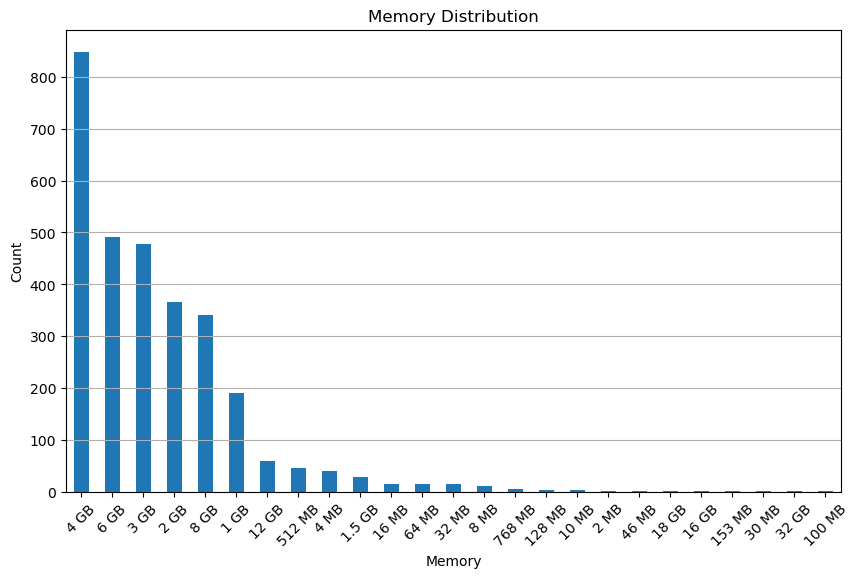

In [117]:
plt.figure(figsize=(10, 6))
df['Memory'].value_counts().plot(kind='bar')
plt.title('Memory Distribution')
plt.xlabel('Memory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [118]:
df['Storage'].value_counts()

Storage
64 GB                    751
128 GB                   741
32 GB                    539
16 GB                    312
256 GB                   219
8 GB                     133
512 GB                    61
4 GB                      56
2 MB                      43
4 MB                      28
1 TB                      14
Expandable Upto 16 GB     12
128 MB                    11
Expandable Upto 32 GB     11
16 MB                     10
8 MB                       5
64 MB                      3
129 GB                     3
256 MB                     3
48 MB                      3
512 MB                     2
130 GB                     2
100 MB                     2
153 MB                     1
10 MB                      1
140 MB                     1
Name: count, dtype: int64

In [119]:
df['Storage'] = df['Storage'].replace('Expandable Upto 32 GB', '32 GB')
df['Storage'] = df['Storage'].replace('Expandable Upto 16 GB', '16 GB')
df['Storage'].value_counts()

Storage
64 GB     751
128 GB    741
32 GB     550
16 GB     324
256 GB    219
8 GB      133
512 GB     61
4 GB       56
2 MB       43
4 MB       28
1 TB       14
128 MB     11
16 MB      10
8 MB        5
64 MB       3
129 GB      3
256 MB      3
48 MB       3
512 MB      2
130 GB      2
100 MB      2
153 MB      1
10 MB       1
140 MB      1
Name: count, dtype: int64

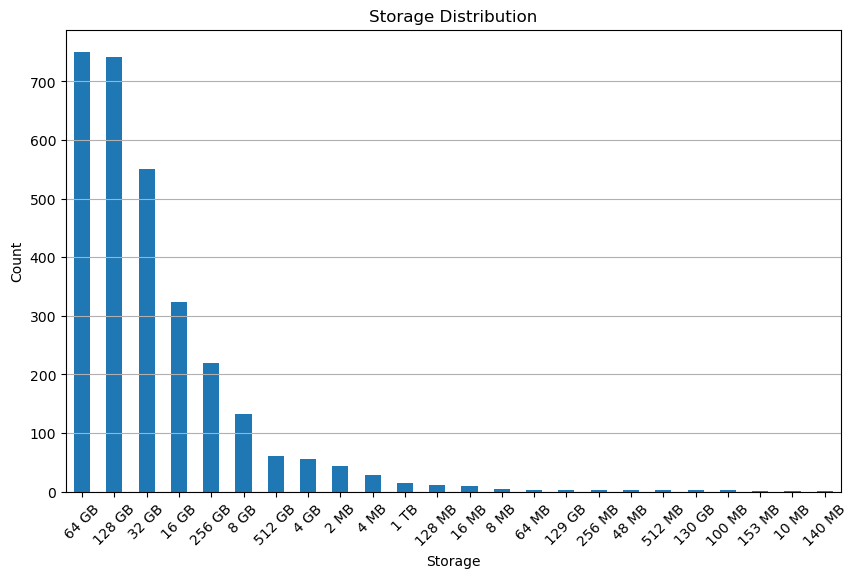

In [120]:
plt.figure(figsize=(10, 6))
df['Storage'].value_counts().plot(kind='bar')
plt.title('Storage Distribution')
plt.xlabel('Storage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [121]:
brand_rating = df[['Brands', 'Rating']]

In [122]:
brand_rating

,Brands,Rating
0,SAMSUNG,4.3
1,Nokia,3.8
2,realme,4.4
3,Infinix,4.2
4,Apple,4.6
...,...,...
3107,SAMSUNG,4.0
3108,SAMSUNG,4.2
3109,POCO,4.4
3112,Apple,NaN


In [123]:
brand_rating.isna().sum()

Brands      0
Rating    130
dtype: int64

In [124]:
brand_rating = brand_rating.dropna()
brand_rating

,Brands,Rating
0,SAMSUNG,4.3
1,Nokia,3.8
2,realme,4.4
3,Infinix,4.2
4,Apple,4.6
...,...,...
3104,LG,3.8
3107,SAMSUNG,4.0
3108,SAMSUNG,4.2
3109,POCO,4.4


In [125]:
brand_rating.isna().sum()

Brands    0
Rating    0
dtype: int64

In [126]:
brand_rating

,Brands,Rating
0,SAMSUNG,4.3
1,Nokia,3.8
2,realme,4.4
3,Infinix,4.2
4,Apple,4.6
...,...,...
3104,LG,3.8
3107,SAMSUNG,4.0
3108,SAMSUNG,4.2
3109,POCO,4.4


In [127]:
brand_rating = brand_rating.groupby('Brands').mean(['Rating'])
brand_rating = brand_rating.Rating.sort_values()

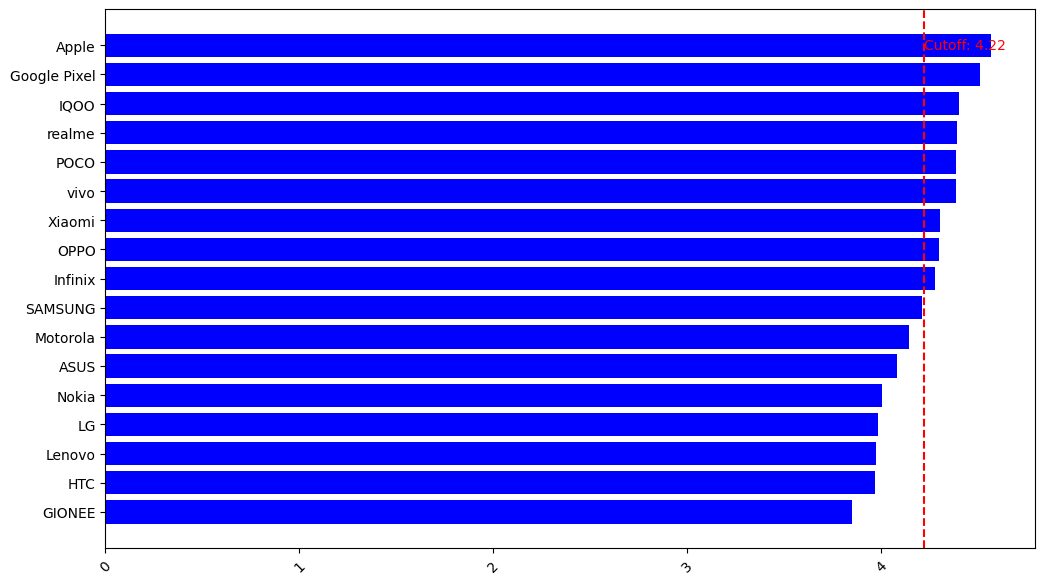

In [128]:
plt.figure(figsize = (12,7))
plt.barh(brand_rating.index, brand_rating.values, color = 'b') # bar is vertical barh is horizontal
middle_value = np.mean(brand_rating.values)
plt.axvline(x=middle_value, color='r', linestyle='--', label='Middle Value')
plt.text(middle_value, len(brand_rating) - 1, f'Cutoff: {middle_value:.2f}', color='r', va='center')
plt.xticks(rotation=45)
plt.show()

In [129]:
mobile_discount = df[['Mobile', 'Discount', 'Original Price', 'Selling Price']]
mobile_discount

,Mobile,Discount,Original Price,Selling Price
0,SAMSUNG GALAXY M31S,1669,20999,19330
1,Nokia 3.2,0,10199,10199
2,realme C2,1000,7999,6999
3,Infinix Note 5,0,12999,12999
4,Apple iPhone 11,0,49900,49900
...,...,...,...,...
3107,SAMSUNG Galaxy S Duos 2,0,5999,5999
3108,SAMSUNG Metro 313,0,2299,2299
3109,POCO M4 Pro 5G,3000,19999,16999
3112,Apple iPhone 13 Pro,0,119900,119900


In [130]:
mobile_discount.sort_values(by = 'Discount') #oppo scamming

,Mobile,Discount,Original Price,Selling Price
2137,OPPO A5s,-8000,4990,12990
3113,GIONEE F9,0,7900,7900
1270,Apple iPhone 12 Pro Max,0,119900,119900
1269,OPPO F3 Plus,0,22990,22990
2264,Xiaomi Redmi Y3,0,9950,9950
...,...,...,...,...
507,LG Wing,50001,80000,29999
306,ASUS ROG,57500,83999,26499
848,Motorola Razr 5G,60000,149999,89999
589,Motorola Razr,75000,149999,74999


In [131]:
mobile_discount = mobile_discount.sort_values(by = 'Discount', ascending = False)
mobile_discount[['Mobile', 'Original Price','Discount']].head(7)

,Mobile,Original Price,Discount
711,Motorola Razr,149999,75000
589,Motorola Razr,149999,75000
848,Motorola Razr 5G,149999,60000
306,ASUS ROG,83999,57500
507,LG Wing,80000,50001
2632,LG Wing,80000,50001
410,Apple iPhone XS Max,124900,45901


In [132]:
top_5_mobiles = mobile_discount.sort_values("Discount",ascending=False).head(5)
top_5_mobiles = top_5_mobiles[['Mobile','Original Price','Discount']]
top_5_mobiles

,Mobile,Original Price,Discount
711,Motorola Razr,149999,75000
589,Motorola Razr,149999,75000
848,Motorola Razr 5G,149999,60000
306,ASUS ROG,83999,57500
507,LG Wing,80000,50001


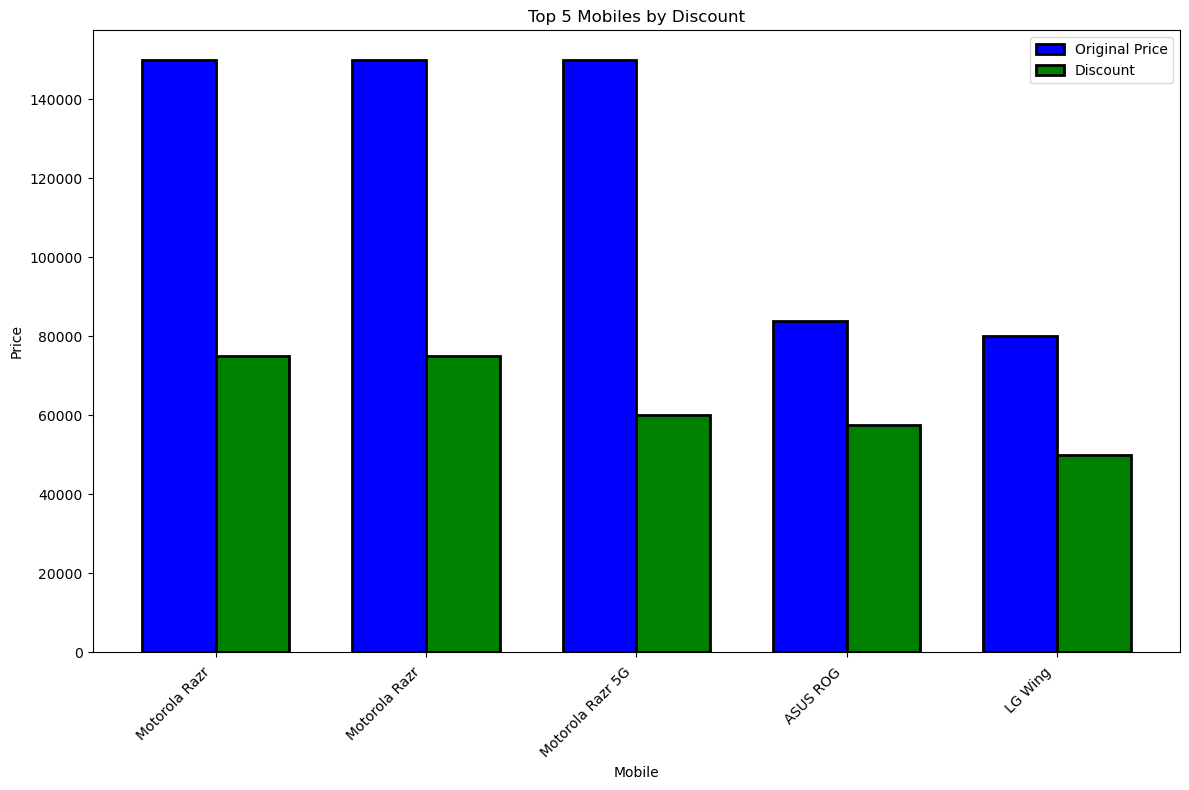

In [133]:
# Define the position of the bars
bar_width = 0.35
index = np.arange(len(top_5_mobiles['Mobile']))

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars
bar1 = ax.bar(index, top_5_mobiles['Original Price'], bar_width, color='blue', edgecolor='black', linewidth=2, label='Original Price')
bar2 = ax.bar(index + bar_width, top_5_mobiles['Discount'], bar_width, color='green', edgecolor='black', linewidth=2, label='Discount')

# Customize the axes
ax.set_xlabel('Mobile')
ax.set_ylabel('Price')
ax.set_title('Top 5 Mobiles by Discount')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_5_mobiles['Mobile'], rotation=45, ha='right')

# Adding a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [134]:
brand_discount = df.groupby('Brands').mean(['Discount'])
brand_discount = brand_discount.Discount.sort_values()
brand_discount

Brands
HTC                0.000000
Lenovo           258.615385
Google Pixel     620.344828
GIONEE           688.859375
Nokia            798.195980
Xiaomi           911.343434
Infinix          918.746667
ASUS            1269.230769
realme          1437.586957
vivo            1696.661290
OPPO            2063.042802
SAMSUNG         2549.796875
POCO            2614.864865
Apple           2874.033951
LG              3044.595960
IQOO            3800.000000
Motorola        4288.548077
Name: Discount, dtype: float64

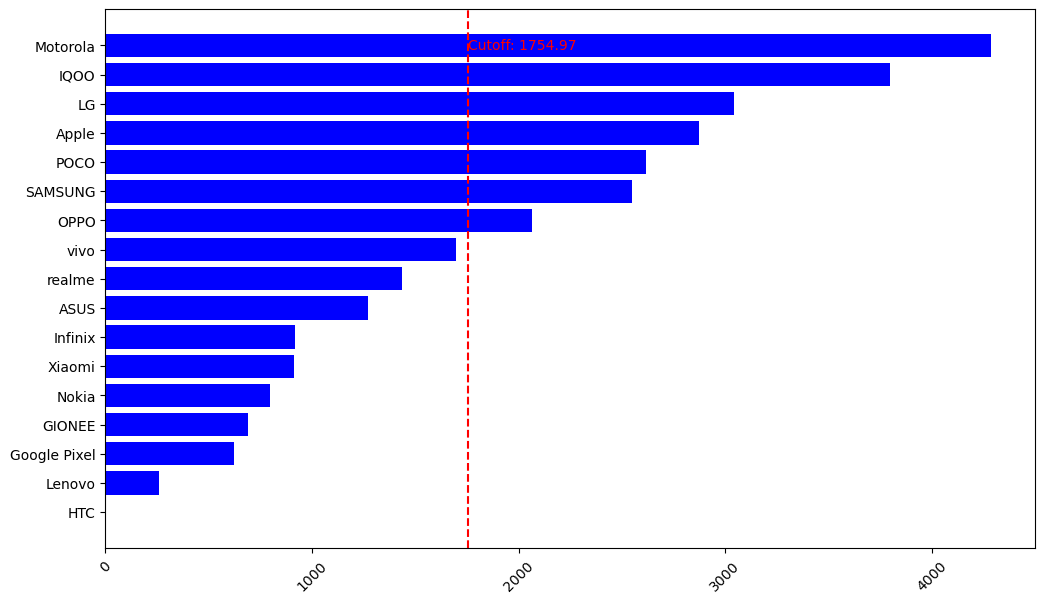

In [135]:
plt.figure(figsize = (12,7))
plt.barh(brand_discount.index, brand_discount.values, color = 'b') # bar is vertical barh is horizontal
middle_value = np.mean(brand_discount.values)
plt.axvline(x=middle_value, color='r', linestyle='--', label='Middle Value')
plt.text(middle_value, len(brand_rating) - 1, f'Cutoff: {middle_value:.2f}', color='r', va='center')
plt.xticks(rotation=45)
plt.show()

In [136]:
brand_sales = df.groupby('Brands').mean(['Selling Price'])
brand_sales = brand_sales['Selling Price'].sort_values()
brand_sales

Brands
GIONEE           7173.656250
Nokia            9663.306533
Lenovo          10086.820513
Infinix         11099.466667
realme          16261.403727
Motorola        16370.528846
POCO            16870.621622
Xiaomi          16941.909091
OPPO            18493.178988
LG              19323.181818
ASUS            20367.324786
vivo            23866.241935
SAMSUNG         24248.139205
HTC             28314.381818
IQOO            37190.000000
Google Pixel    61391.862069
Apple           85963.077160
Name: Selling Price, dtype: float64

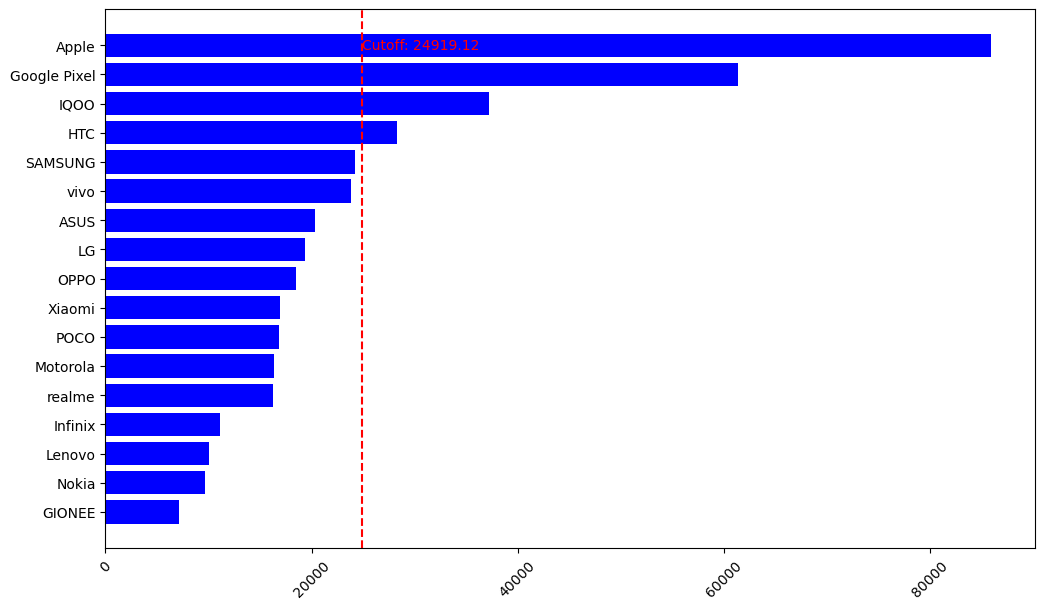

In [137]:
plt.figure(figsize = (12,7))
plt.barh(brand_sales.index, brand_sales.values, color = 'b') # bar is vertical barh is horizontal
middle_value = np.mean(brand_sales.values)
plt.axvline(x=middle_value, color='r', linestyle='--', label='Middle Value')
plt.text(middle_value, len(brand_rating) - 1, f'Cutoff: {middle_value:.2f}', color='r', va='center')
plt.xticks(rotation=45)
plt.show()

In [138]:
selling_price = df[['Mobile', 'Selling Price']].sort_values(by = 'Selling Price', ascending = False)
selling_price_indvidual = selling_price
selling_price_aggregrated = selling_price.groupby('Mobile').mean('Selling Price')

In [139]:
t5sp = selling_price_indvidual.head()
t5sp

,Mobile,Selling Price
1185,Apple iPhone 13 Pro Max,179900
813,Apple iPhone 13 Pro Max,179900
2032,Apple iPhone 13 Pro Max,179900
903,Apple iPhone 13 Pro Max,179900
1285,Apple iPhone 13 Pro Max,179900


In [140]:
l5sp = selling_price_indvidual.tail()
l5sp

,Mobile,Selling Price
978,GIONEE L700,1099
2487,GIONEE S96,1099
1338,SAMSUNG GT 1200 R/I/M,1099
2054,Nokia Ta -1010/105,1000
1501,Nokia 105,1000


In [141]:
t5ag = selling_price_aggregrated.head()
t5ag

,Selling Price
Mobile,
ASUS 6Z,40284.714286
ASUS ROG,26499.000000
ASUS ROG 5s,53999.000000
ASUS ROG 5s Pro,79999.000000
ASUS ROG Phone 3,51665.666667


In [142]:
l5ag = selling_price_aggregrated.tail()
l5ag

,Selling Price
Mobile,
vivo Y93,11990.000000
vivo Y94,15990.000000
vivo Y95,18663.333333
vivo Z1 Pro,16656.666667
vivo Z1x,19990.000000


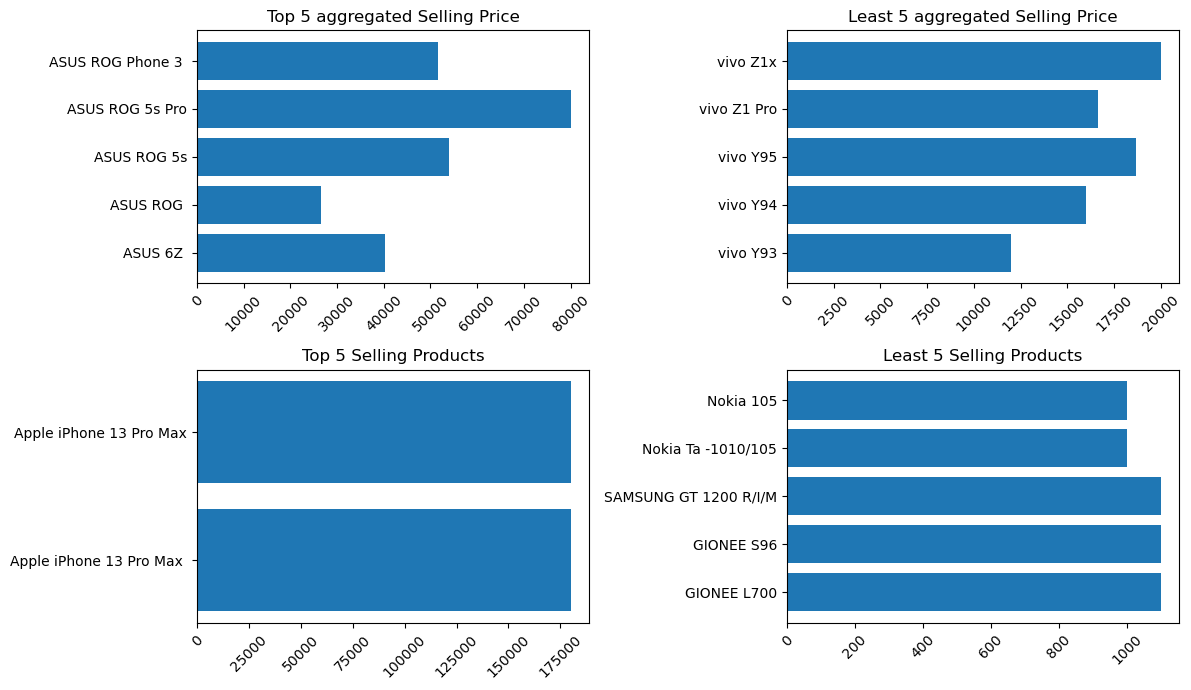

In [143]:
plt.figure(figsize = (12,7))
plt.subplot(221) #dividing the graph into 2 columns and 2 rows and 1 menas accessing 1st plot
plt.barh(t5ag['Selling Price'].index, t5ag['Selling Price'].values)
plt.xticks(rotation =45)
plt.title('Top 5 aggregated Selling Price')
plt.subplot(222) # accessing 2nd plot
plt.barh(l5ag['Selling Price'].index, l5ag['Selling Price'].values)
plt.xticks(rotation =45)
plt.title('Least 5 aggregated Selling Price')
plt.subplot(223) # accessing 3rd plot
plt.barh(t5sp['Mobile'], t5sp['Selling Price'])
plt.xticks(rotation =45)
plt.title('Top 5 Selling Products')
plt.subplot(224) #accessing 4th plot
plt.barh(l5sp['Mobile'], l5sp['Selling Price'])
plt.xticks(rotation =45)
plt.title('Least 5 Selling Products')
plt.tight_layout()
plt.show()